## Final Project Submission

Please fill out:
* Student name: Innocent Mbuvi 
* Student pace: full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


# Data-Driven Decision Making: Empowering Microsoft's Movie Studio Venture

# 1. Business Understanding

## Introduction
In a bid to diversify its portfolio and tap into the entertainment industry, Microsoft has embarked on a new venture to create a new movie studio. However, due to the lack of expertise in the realm of film production, Microsoft seeks to leverage data-driven insights from successful films at the box office. As a data analyst, I have been tasked with analyzing the movie industry data to provide actionable insights that will help Microsoft make informed decisions on the types of movies to produce.

## Business Problem
Microsoft sees the potential of the creating original video content and has decided to create a new movie studio. However, they lack the expertise in the film industry and are looking for data-driven insights to help them make informed decisions on the types of movies to produce. The goal of this analysis is to provide actionable insights that will help Microsoft maximize their return on investment and increase their chances of success in the movie industry.

## Objectives
The objectives of this analysis are to:
- Identify the most successful genres at the box office.
- Determine the most successful months for movie releases.
- Identify the most successful directors and actors.
- Identify the most successful production companies.
- Determine the relationship between movie budgets and box office revenue.
- Determine the relationship between production companies and box office revenue.
- Determine the relationship between directors and box office revenue.
- Determine the relationship between actors and box office revenue.
- Determine the relationship between genres and box office revenue.
- Determine the relationship between release months and box office revenue.

## Business Value
The insights from this analysis will help Microsoft make informed decisions on the types of movies to produce, the best time to release movies, the best directors and actors to work with, and the best production companies to partner with. This will help Microsoft maximize their return on investment and increase their chances of success in the movie industry.

## Source of Data
1. https://www.boxofficemojo.com/
2. https://www.imdb.com/
3. https://www.rottentomatoes.com/
4. https://www.themoviedb.org/
5. https://www.the-numbers.com/





# 2. Data Understanding
In this section, the following will be carried out:
- Load the data and explore it to understand its structure and contents.
- Check for missing values and duplicates.
- Identify the relevant data for our analysis. 

### Importing the necesary libraries and loading the data


In [428]:
#Importing necessary libraries
import csv
import pandas as pd
import _sqlite3

In [429]:
#LOADING THE DATA

#Loading the data from the csv file
box_office = pd.read_csv('data/bom.movie_gross.csv')
the_movie = pd.read_csv('data/tmdb.movies.csv')
the_number = pd.read_csv('data/tn.movie_budgets.csv')

#Loading the data from the tsv file
rotten_tomatoes_movie = pd.read_csv('data/rt.movie_info.tsv', delimiter='\t')
rotten_tomatoes_review = pd.read_csv('data/rt.reviews.tsv', delimiter='\t', encoding='latin1')

#Loading data from a database
#Connecting to the database
conn = _sqlite3.connect('data/im.db')

## Explore Data Characteristics

## a. Box Office Mojo

In [430]:
# columns in the data
box_office.columns

Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object')

In [431]:
''''
The data contains 5 columns. The columns are:
- title
- studio
- domestic_gross
- foreign_gross
- year
'''

"'\nThe data contains 5 columns. The columns are:\n- title\n- studio\n- domestic_gross\n- foreign_gross\n- year\n"

In [432]:
# Data types of the columns and total number of entries
box_office.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [433]:
'''
The various data types are: 
- object - title, studio, foreign_gross
- int64 - year
- float64 - domestic_gross

The total number of entries is 3387
'''

'\nThe various data types are: \n- object - title, studio, foreign_gross\n- int64 - year\n- float64 - domestic_gross\n\nThe total number of entries is 3387\n'

In [434]:
# Checking for missing values
null_values = box_office.isnull()
print(null_values.sum())

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64


In [435]:
'''
There are a total of 1383 missing values.
studio has 5 missing values
foreign_gross has 1350 missing values
domestic_gross has 28 missing values

'''

'\nThere are a total of 1383 missing values.\nstudio has 5 missing values\nforeign_gross has 1350 missing values\ndomestic_gross has 28 missing values\n\n'

In [436]:
#Checking for duplicates
duplicates = box_office.duplicated()
print(duplicates.sum())

0


In [437]:
'''
There are no duplicates in the data.
'''

'\nThere are no duplicates in the data.\n'

## b. IMDB 

In [438]:
# Fetch table names from the database
table_names = pd.read_sql('SELECT name FROM sqlite_master WHERE type="table";', conn)
table_names

,name
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers


In [439]:
''' 
The database contains the following tables which are:
- movie_basics
- directors
- known_for
- movie_akas
- movie_ratings
- persons
- principals
- writers
'''

' \nThe database contains the following tables which are:\n- movie_basics\n- directors\n- known_for\n- movie_akas\n- movie_ratings\n- persons\n- principals\n- writers\n'

In [440]:
#Store data in the database into a dataframe for easy identification of null values
query_movie_basics = '''
SELECT * FROM movie_basics
'''
movie_basics = pd.read_sql(query_movie_basics, conn)
movie_basics

query_directors = '''
SELECT * FROM directors
'''
directors = pd.read_sql(query_directors, conn)

query_known_for = '''
SELECT * FROM known_for
'''
known_for = pd.read_sql(query_known_for, conn)

query_movie_akas = '''
SELECT * FROM movie_akas
'''
movie_akas = pd.read_sql(query_movie_akas, conn)

query_movie_ratings = '''
SELECT * FROM movie_ratings
'''
movie_ratings = pd.read_sql(query_movie_ratings, conn)

query_persons = '''
SELECT * FROM persons
'''
persons = pd.read_sql(query_persons, conn)

query_principals = '''
SELECT * FROM principals
'''
principals = pd.read_sql(query_principals, conn)

query_writers = '''
SELECT * FROM writers
'''
writers = pd.read_sql(query_writers, conn)

In [441]:
#Check for missing values in movie_basics table
null_values_movie_basics = movie_basics.isnull()
print(null_values_movie_basics.sum())

movie_id               0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64


In [442]:
#Check for missing values in directors table
null_values_directors = directors.isnull()
print(null_values_directors.sum())

movie_id     0
person_id    0
dtype: int64


In [443]:
'There are no missing values in the directors table'

'There are no missing values in the directors table'

In [444]:
#Check for missing values in known_for table
null_values_known_for = known_for.isnull()
print(null_values_known_for.sum())

person_id    0
movie_id     0
dtype: int64


In [445]:
'There are no missing values in the known_for table'



'There are no missing values in the known_for table'

In [446]:
#Check for missing values in movie_akas table
null_values_movie_akas = movie_akas.isnull()
print(null_values_movie_akas.sum())

movie_id                  0
ordering                  0
title                     0
region                53293
language             289988
types                163256
attributes           316778
is_original_title        25
dtype: int64


In [447]:
'''
The movie_akas table has the following missing values:
- region - 53293
- language - 289988
- types - 163256
- attributes - 316778
- is_original_title - 25
'''

'\nThe movie_akas table has the following missing values:\n- region - 53293\n- language - 289988\n- types - 163256\n- attributes - 316778\n- is_original_title - 25\n'

In [448]:
#Check for missing values in movie_ratings table
null_values_movie_ratings = movie_ratings.isnull()
print(null_values_movie_ratings.sum())

movie_id         0
averagerating    0
numvotes         0
dtype: int64


In [449]:
'There are no missing values in the movie_ratings table'

'There are no missing values in the movie_ratings table'

In [450]:
#Check for missing values in persons table
null_values_persons = persons.isnull()
print(null_values_persons.sum())


person_id                  0
primary_name               0
birth_year            523912
death_year            599865
primary_profession     51340
dtype: int64


In [451]:
'''
The persons table has the following missing values:
- birth_year - 523912
- death_year - 599865
- primary_profession - 51340
'''

'\nThe persons table has the following missing values:\n- birth_year - 523912\n- death_year - 599865\n- primary_profession - 51340\n'

In [452]:
#Check for missing values in principals table
null_values_principals = principals.isnull()
print(null_values_principals.sum())

movie_id           0
ordering           0
person_id          0
category           0
job           850502
characters    634826
dtype: int64


In [453]:
'''
The principals table has the following missing values:
- job - 850502
- characters - 634826
'''

'\nThe principals table has the following missing values:\n- job - 850502\n- characters - 634826\n'

In [454]:
#Check for missing values in writers table
null_values_writers = writers.isnull()
print(null_values_writers.sum())

movie_id     0
person_id    0
dtype: int64


In [455]:
'''
The writers table has no missing values:

'''

'\nThe writers table has no missing values:\n\n'

## c. Rotten Tomatoes

In [456]:
# Columns in the dataset
rotten_tomatoes_movie.columns

Index(['id', 'synopsis', 'rating', 'genre', 'director', 'writer',
       'theater_date', 'dvd_date', 'currency', 'box_office', 'runtime',
       'studio'],
      dtype='object')

In [457]:
'''
Columns in the rotten_tomatoes_movie dataset are:
- id
- synopsis
- rating
- genre
- director
- writer
- theater_date
- dvd_date
- currency
- box_office
- runtime

'''

'\nColumns in the rotten_tomatoes_movie dataset are:\n- id\n- synopsis\n- rating\n- genre\n- director\n- writer\n- theater_date\n- dvd_date\n- currency\n- box_office\n- runtime\n\n'

In [458]:
# Data types of the columns and total number of entries
rotten_tomatoes_movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


In [459]:
'''
This dataset has the following data types:
- int64 - id
- object - synopsis, rating, genre, director, writer, theater_date, dvd_date, currency, box_office

The total number of entries is 1560
'''

'\nThis dataset has the following data types:\n- int64 - id\n- object - synopsis, rating, genre, director, writer, theater_date, dvd_date, currency, box_office\n\nThe total number of entries is 1560\n'

In [460]:
# Checking for missing values
null_values = rotten_tomatoes_movie.isnull()
print(null_values.sum())

id                 0
synopsis          62
rating             3
genre              8
director         199
writer           449
theater_date     359
dvd_date         359
currency        1220
box_office      1220
runtime           30
studio          1066
dtype: int64


In [461]:
'''
synopsis has 62 missing values
rating has 3 missing values
genre has 8 missing values
director has 199 missing values
writer has 449 missing values
theater_date has 359 missing values
dvd_data has 359 missing values
currency has 1220 missing values
box_office has 1220 missing values
runtime has 30 missing values
studio has 1066 missing values
'''

'\nsynopsis has 62 missing values\nrating has 3 missing values\ngenre has 8 missing values\ndirector has 199 missing values\nwriter has 449 missing values\ntheater_date has 359 missing values\ndvd_data has 359 missing values\ncurrency has 1220 missing values\nbox_office has 1220 missing values\nruntime has 30 missing values\nstudio has 1066 missing values\n'

In [462]:
#Checking for duplicates
duplicates = rotten_tomatoes_movie.duplicated()
print(duplicates.sum())


0


In [463]:
'There are no duplicates in the dataset'

'There are no duplicates in the dataset'

c.(i) Rotten Tomatoes Reviews

In [464]:
# Columns in the dataset
rotten_tomatoes_review.columns

Index(['id', 'review', 'rating', 'fresh', 'critic', 'top_critic', 'publisher',
       'date'],
      dtype='object')

In [465]:
'''
This dataset has the following columns:
- id
- review
- rating
- fresh
- critic
- top_critic
- publisher
- date
'''

'\nThis dataset has the following columns:\n- id\n- review\n- rating\n- fresh\n- critic\n- top_critic\n- publisher\n- date\n'

In [466]:
# Data types of the columns and total number of entries
rotten_tomatoes_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54432 non-null  int64 
 1   review      48869 non-null  object
 2   rating      40915 non-null  object
 3   fresh       54432 non-null  object
 4   critic      51710 non-null  object
 5   top_critic  54432 non-null  int64 
 6   publisher   54123 non-null  object
 7   date        54432 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB


In [467]:
'''
The dataset has the following datatypes:
- int64 - id, top_critic
- object - review, rating, fresh, critic, publisher, date

The total number of entries is 54432
'''

'\nThe dataset has the following datatypes:\n- int64 - id, top_critic\n- object - review, rating, fresh, critic, publisher, date\n\nThe total number of entries is 54432\n'

In [468]:
#Checking for missing values
null_values = rotten_tomatoes_review.isnull()
print(null_values.sum())

id                0
review         5563
rating        13517
fresh             0
critic         2722
top_critic        0
publisher       309
date              0
dtype: int64


In [469]:
'''
review has 5563 missing values
rating has 13517 missing values
critic has 2722 missing values
publisher has 309 missing values

There are total of 22111 missing values in the dataset
'''

'\nreview has 5563 missing values\nrating has 13517 missing values\ncritic has 2722 missing values\npublisher has 309 missing values\n\nThere are total of 22111 missing values in the dataset\n'

In [470]:
#Check for duplicates
duplicates = rotten_tomatoes_review.duplicated()
print(duplicates.sum())

9


In [471]:
'There are 9 duplicates in the dataset'

'There are 9 duplicates in the dataset'

## d. The Movie Database (TMDb)

In [472]:
# Columns in the dataset
the_movie.columns

Index(['Unnamed: 0', 'genre_ids', 'id', 'original_language', 'original_title',
       'popularity', 'release_date', 'title', 'vote_average', 'vote_count'],
      dtype='object')

In [473]:
'''
The columns in the dataset are:
- genre_ids
- id
- original_language
- original_title
- popularity
- release_date
- title
- vote_average
- vote_count

There is one unnamed column in the dataset
'''

'\nThe columns in the dataset are:\n- genre_ids\n- id\n- original_language\n- original_title\n- popularity\n- release_date\n- title\n- vote_average\n- vote_count\n\nThere is one unnamed column in the dataset\n'

In [474]:
# Data types of the columns and total number of entries
the_movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


In [475]:
'''
The dataset has the following data types:
- int64 - id, vote_count, unnamed: 0
- object - genre_ids, original_language, original_title, release_date, title
- float64 - popularity, vote_average

'''

'\nThe dataset has the following data types:\n- int64 - id, vote_count, unnamed: 0\n- object - genre_ids, original_language, original_title, release_date, title\n- float64 - popularity, vote_average\n\n'

In [476]:
# Checking for missing values
null_values = the_movie.isnull()
print(null_values.sum())

Unnamed: 0           0
genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64


In [477]:
'There are no null values in the dataset'

'There are no null values in the dataset'

In [478]:
#Checking for duplicates
duplicates = the_movie.duplicated()
print(duplicates.sum())

0


In [479]:
'There are no duplicates in the dataset'

'There are no duplicates in the dataset'

## e. The Numbers

In [480]:
# Columns in the dataset
the_number.columns

Index(['id', 'release_date', 'movie', 'production_budget', 'domestic_gross',
       'worldwide_gross'],
      dtype='object')

In [481]:
'''
The columns in this dataset are:
- id
- release_date
- movie
- production_budget
- domestic_gross
- worldwide_gross
'''

'\nThe columns in this dataset are:\n- id\n- release_date\n- movie\n- production_budget\n- domestic_gross\n- worldwide_gross\n'

In [482]:
# Data Types and total number of entries
the_number.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [483]:
'''
The dataset has the following data types:
- int64 - id
- object - release_date, movie, production_budget, domestic_gross, worldwide_gross

There are a total of 5782 entries in the dataset
'''

'\nThe dataset has the following data types:\n- int64 - id\n- object - release_date, movie, production_budget, domestic_gross, worldwide_gross\n\nThere are a total of 5782 entries in the dataset\n'

In [484]:
# Checking missing values
null_values = the_number.isnull()
print(null_values.sum())

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64


In [485]:
'There are no missing values in the dataset'

'There are no missing values in the dataset'

In [486]:
#Checking for duplicates
duplicates = the_number.duplicated()
print(duplicates.sum())

0


In [487]:
'There are no duplicates in the dataset'

'There are no duplicates in the dataset'

## Conclusion
Based on the data understanding and data quality checks done for the various datasets provided, the following datasets are suitable for carrying out analysis:
- Box Office Mojo (bom.movie_gross.csv)
- The Numbers (tn.movie_budgets.csv)
- IMDB (im.db)

- The above datasets are suitable for analysis because the data answers the questions that we are trying to answer.
- The datasets have minimal missing values and no duplicates which is suitable for analysis.


# 3. Data Preparation
In this section the following will be carried out:
- Clean the data by addressing missing values, correcting errors, and removing duplicates.
- Standardize data formats and units to facilitate uniform analysis.
- Perform feature engineering to create new variables or derive additional insights from existing data attributes.
- Transform categorical variables into numerical representations.

## a. Box Office Mojo

In [488]:
#Addressing missing values in the box_office dataset
#Drop missing values in the studio column
box_office.dropna(subset=['studio'], inplace=True)

#Drop missing values in the domestic_gross column
box_office.dropna(subset = ['domestic_gross'], inplace=True)

#Drop missing values in the foreign_gross column
box_office.dropna(subset = ['foreign_gross'], inplace=True)



In [489]:
#Check if there are any missing values remaining
null_values = box_office.isnull()
print(null_values.sum())

title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64


In [490]:
box_office.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2007 entries, 0 to 3353
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           2007 non-null   object 
 1   studio          2007 non-null   object 
 2   domestic_gross  2007 non-null   float64
 3   foreign_gross   2007 non-null   object 
 4   year            2007 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 94.1+ KB


In [491]:
'''
The strategy used to handle missing values in the box_office dataset 
was to drop the missing values in the studio, domestic_gross and foreign_gross columns.
This is because the missing values in these columns are not too many and dropping them will not affect the dataset since the
dataset has a total of 3387 entries.
'''

'\nThe strategy used to handle missing values in the box_office dataset \nwas to drop the missing values in the studio, domestic_gross and foreign_gross columns.\nThis is because the missing values in these columns are not too many and dropping them will not affect the dataset since the\ndataset has a total of 3387 entries.\n'

In [492]:
#Change the data type of the foreign_gross column to float
box_office['foreign_gross'] = box_office['foreign_gross'].str.replace(',', '').astype(float)

In [493]:
box_office.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2007 entries, 0 to 3353
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           2007 non-null   object 
 1   studio          2007 non-null   object 
 2   domestic_gross  2007 non-null   float64
 3   foreign_gross   2007 non-null   float64
 4   year            2007 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 94.1+ KB


In [494]:
'''
Change the data type of foreign gross to float since it contains numerical values. 
'''

'\nChange the data type of foreign gross to float since it contains numerical values. \n'

In [495]:
# Perform feature engineering to create a new column called total_gross
# This column will contain the sum of the domestic_gross and foreign_gross columns
# representing the total gross of the movie
box_office['total_gross'] = box_office['domestic_gross'] + box_office['foreign_gross']
box_office.head()

,title,studio,domestic_gross,foreign_gross,year,total_gross
0,Toy Story 3,BV,415000000.0,652000000.0,2010,1.067000e+09
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010,1.025500e+09
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010,9.603000e+08
3,Inception,WB,292600000.0,535700000.0,2010,8.283000e+08
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,7.526000e+08


In [496]:
#Perform feature engineering to create a new column called age of movie
#This column will contain the difference between the current year and the year the movie was released
# representing the age of the movie

#Import the datetime library
import datetime
current_year = datetime.datetime.now().year
box_office['age_of_movie'] = current_year - box_office['year']
box_office.tail(10)

,title,studio,domestic_gross,foreign_gross,year,total_gross,age_of_movie
3261,Gauguin: Voyage to Tahiti,Cohen,200000.0,3100000.0,2018,3300000.0,6
3263,The Front Runner,Sony,2000000.0,1200000.0,2018,3200000.0,6
3265,Wildlife,IFC,1100000.0,2000000.0,2018,3100000.0,6
3268,Billionaire Boy's Club,VE,1300.0,2500000.0,2018,2501300.0,6
3271,Bilal: A New Breed of Hero,VE,491000.0,1700000.0,2018,2191000.0,6
3275,I Still See You,LGF,1400.0,1500000.0,2018,1501400.0,6
3286,The Catcher Was a Spy,IFC,725000.0,229000.0,2018,954000.0,6
3309,Time Freak,Grindstone,10000.0,256000.0,2018,266000.0,6
3342,Reign of Judges: Title of Liberty - Concept Short,Darin Southa,93200.0,5200.0,2018,98400.0,6
3353,Antonio Lopez 1970: Sex Fashion & Disco,FM,43200.0,30000.0,2018,73200.0,6


## b. IMDB 

### Addressing Missing Values

a. movie_basics table

In [497]:
# Addressing missing values from movie_basics table
#Replace the null values in the original_title column with 'Unknown' since the column contains categorical values
movie_basics['original_title'] = movie_basics['original_title'].fillna('Unknown')

#Replace the null values in the runtime_minutes column with the median value since the column contains numerical values
#and the median is not affected by outliers
movie_basics['runtime_minutes'] = movie_basics['runtime_minutes'].fillna(movie_basics['runtime_minutes'].median())

#Replace the null values in the genres column with 'Unknown' since the column contains categorical values
movie_basics['genres'] = movie_basics['genres'].fillna('Unknown')


In [498]:
movie_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146144 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  146144 non-null  float64
 5   genres           146144 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


b. movie_akas table

In [499]:
#Addressing missing values from the movie_akas table
#Replace the null values in the region column with 'Unknown' since the column contains categorical values
movie_akas['region'] = movie_akas['region'].fillna('Unknown')

#Replace the null values in the language column with 'Unknown' since the column contains categorical values
movie_akas['language'] = movie_akas['language'].fillna('Unknown')

#Replace the null values in the types column with 'Unknown' since the column contains categorical values
movie_akas['types'] = movie_akas['types'].fillna('Unknown')

#Replace the null values in the attributes column with 'Unknown' since the column contains categorical values
movie_akas['attributes'] = movie_akas['attributes'].fillna('Unknown')

#drop the null values in the is_original_title column since the number of missing values is not too many
movie_akas.dropna(subset=['is_original_title'], inplace=True)


In [500]:
movie_akas.info()

<class 'pandas.core.frame.DataFrame'>
Index: 331678 entries, 0 to 331702
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   movie_id           331678 non-null  object 
 1   ordering           331678 non-null  int64  
 2   title              331678 non-null  object 
 3   region             331678 non-null  object 
 4   language           331678 non-null  object 
 5   types              331678 non-null  object 
 6   attributes         331678 non-null  object 
 7   is_original_title  331678 non-null  float64
dtypes: float64(1), int64(1), object(6)
memory usage: 22.8+ MB


c. persons table

In [501]:
# Addressing missing values from the persons table
#drop the columns since the data of the columns are not relevant to the analysis
persons.drop(['birth_year'], axis=1, inplace=True)

#drop the columns since the data of the columns are not relevant to the analysis
persons.drop(['death_year'], axis=1, inplace=True)

#Replace the null values in the primary_profession column with 'Unknown' since the column contains categorical values
persons['primary_profession'] = persons['primary_profession'].fillna('Unknown')

In [502]:
persons.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606648 entries, 0 to 606647
Data columns (total 3 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   person_id           606648 non-null  object
 1   primary_name        606648 non-null  object
 2   primary_profession  606648 non-null  object
dtypes: object(3)
memory usage: 13.9+ MB


d. principals table

In [503]:
#Addressing missing values from the principals table
#Replace the null values in the job column with 'Unknown' since the column contains categorical values
principals['job'] = principals['job'].fillna('Unknown')

#Replace the null values in the characters column with 'Unknown' since the column contains categorical values
principals['characters'] = principals['characters'].fillna('Unknown')



In [504]:
principals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028186 entries, 0 to 1028185
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   movie_id    1028186 non-null  object
 1   ordering    1028186 non-null  int64 
 2   person_id   1028186 non-null  object
 3   category    1028186 non-null  object
 4   job         1028186 non-null  object
 5   characters  1028186 non-null  object
dtypes: int64(1), object(5)
memory usage: 47.1+ MB


### Joining Tables

In [505]:
# Join movie_basics table and movie_ratings table on the movie_id column
# This is to analyze movie ratings and other attributes of the movies
movie_basics_ratings = movie_basics.merge(movie_ratings, how='left', on='movie_id')
movie_basics_ratings.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77.0
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43.0
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517.0
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,87.0,"Comedy,Drama",6.1,13.0
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119.0


In [506]:
# Join movies_basics_ratings table and principals table on the movie_id column
# To analyze involvement of persons in the movies
movie_basics_principals = movie_basics.merge(principals, how='left', on='movie_id')
movie_basics_principals.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,ordering,person_id,category,job,characters
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",10.0,nm0006210,composer,Unknown,Unknown
1,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",1.0,nm0474801,actor,Unknown,"[""Kundan S. Prasad"",""Bajrangi""]"
2,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",2.0,nm0904537,actress,Unknown,"[""Munni"",""Laila-E-Aasmaan""]"
3,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",3.0,nm0756379,actor,Unknown,"[""Ganeshi N. Prasad""]"
4,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",4.0,nm0474876,actor,Unknown,"[""Dwarka N. Prasad""]"


In [507]:
# Join movie_basics table and directors table on the movie_id column
# To identify movies directed by specific dirctors
movie_basics_directors = movie_basics.merge(directors, how='left', on='movie_id')
movie_basics_directors.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,person_id
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",nm0712540
1,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",nm0712540
2,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",nm0712540
3,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",nm0712540
4,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",nm0002411


In [508]:
#Join movie_basics table and writers table on the movie_id column
#To identify movies written by specific writers
movie_basics_writers = movie_basics.merge(writers, how='left', on='movie_id')
movie_basics_writers.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,person_id
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",nm0023551
1,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",nm1194313
2,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",nm0347899
3,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",nm1391276
4,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",NaN


In [509]:
#Join persons table and known_for table on the person_id column
#to associate individuals with their known movies, providing insights into their contributions and successes.
persons_known_for = persons.merge(known_for, how='left', on='person_id')
persons_known_for.head()

,person_id,primary_name,primary_profession,movie_id
0,nm0061671,Mary Ellen Bauder,"miscellaneous,production_manager,producer",tt0837562
1,nm0061671,Mary Ellen Bauder,"miscellaneous,production_manager,producer",tt2398241
2,nm0061671,Mary Ellen Bauder,"miscellaneous,production_manager,producer",tt0844471
3,nm0061671,Mary Ellen Bauder,"miscellaneous,production_manager,producer",tt0118553
4,nm0061865,Joseph Bauer,"composer,music_department,sound_department",tt0896534


## c. The Numbers

In [510]:
# Turn the production_budget, domestic_gross and worldwide_gross columns to float
# This is because the columns contain numerical values
# Remove the commas and dollar signs from the columns
the_number['production_budget'] = the_number['production_budget'].str.replace(',', '').str.replace('$', '').astype(float)
the_number['domestic_gross'] = the_number['domestic_gross'].str.replace(',', '').str.replace('$', '').astype(float)
the_number['worldwide_gross'] = the_number['worldwide_gross'].str.replace(',', '').str.replace('$', '').astype(float)


In [511]:
# Turn the release_date column to datetime
the_number['release_date'] = pd.to_datetime(the_number['release_date'])

In [512]:
the_number.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 5782 non-null   int64         
 1   release_date       5782 non-null   datetime64[ns]
 2   movie              5782 non-null   object        
 3   production_budget  5782 non-null   float64       
 4   domestic_gross     5782 non-null   float64       
 5   worldwide_gross    5782 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(1)
memory usage: 271.2+ KB


In [513]:
# Feature engineering to create a new column called total_gross
# This column will contain the sum of the domestic_gross and worldwide_gross columns
# representing the total gross of the movie
the_number['total_gross'] = the_number['domestic_gross'] + the_number['worldwide_gross']
the_number.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_gross
0,1,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09,3.536853e+09
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,1.286728e+09
2,3,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,1.925247e+08
3,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,1.862020e+09
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,1.936903e+09


In [514]:
#Feature engineering to create a new column called profit
#This column will contain the difference between the total_gross and the production_budget columns
#representing the profit made from the movie
the_number['profit'] = the_number['total_gross'] - the_number['production_budget']
the_number.tail()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_gross,profit
5777,78,2018-12-31,Red 11,7000.0,0.0,0.0,0.0,-7000.0
5778,79,1999-04-02,Following,6000.0,48482.0,240495.0,288977.0,282977.0
5779,80,2005-07-13,Return to the Land of Wonders,5000.0,1338.0,1338.0,2676.0,-2324.0
5780,81,2015-09-29,A Plague So Pleasant,1400.0,0.0,0.0,0.0,-1400.0
5781,82,2005-08-05,My Date With Drew,1100.0,181041.0,181041.0,362082.0,360982.0


## d. Rotten Tomatoes

In [515]:
# Addressing missing values in the rotten_tomatoes_movie dataset
# Replace the null values in the synopsis column with 'Unknown' since the column contains categorical values
rotten_tomatoes_movie['synopsis'] = rotten_tomatoes_movie['synopsis'].fillna('Unknown')

# Replace the null values in the rating column with 'Unknown' since the column contains categorical values
rotten_tomatoes_movie['rating'] = rotten_tomatoes_movie['rating'].fillna('Unknown')

# Replace the null values in the genre column with 'Unknown' since the column contains categorical values
rotten_tomatoes_movie['genre'] = rotten_tomatoes_movie['genre'].fillna('Unknown')

# Replace the null values in the director column with 'Unknown' since the column contains categorical values
rotten_tomatoes_movie['director'] = rotten_tomatoes_movie['director'].fillna('Unknown')

# Replace the null values in the writer column with 'Unknown' since the column contains categorical values
rotten_tomatoes_movie['writer'] = rotten_tomatoes_movie['writer'].fillna('Unknown')

# Replace the null values in the theater_date column with 'Unknown' since the column contains categorical values
rotten_tomatoes_movie['theater_date'] = rotten_tomatoes_movie['theater_date'].fillna('Unknown')

# Replace the null values in the dvd_date column with 'Unknown' since the column contains categorical values
rotten_tomatoes_movie['dvd_date'] = rotten_tomatoes_movie['dvd_date'].fillna('Unknown')

# Replace the null values in the currency column with 'Unknown' since the column contains categorical values
rotten_tomatoes_movie['currency'] = rotten_tomatoes_movie['currency'].fillna('Unknown')

# Replace the null values in the box_office column with 'Unknown' since the column contains categorical values
rotten_tomatoes_movie['box_office'] = rotten_tomatoes_movie['box_office'].fillna('Unknown')

# Replace the null values in the runtime column with the median value since the column contains numerical values and the median is not affected by outliers
rotten_tomatoes_movie['runtime'] = rotten_tomatoes_movie['runtime'].fillna('Unknown')

# Replace the null values in the studio column with 'Unknown' since the column contains categorical values
rotten_tomatoes_movie['studio'] = rotten_tomatoes_movie['studio'].fillna('Unknown')

rotten_tomatoes_movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1560 non-null   object
 2   rating        1560 non-null   object
 3   genre         1560 non-null   object
 4   director      1560 non-null   object
 5   writer        1560 non-null   object
 6   theater_date  1560 non-null   object
 7   dvd_date      1560 non-null   object
 8   currency      1560 non-null   object
 9   box_office    1560 non-null   object
 10  runtime       1560 non-null   object
 11  studio        1560 non-null   object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


## i. Rotten Tomatoes reviews

In [516]:
rotten_tomatoes_review.head()

# id                0
# review         5563
# rating        13517
# fresh             0
# critic         2722
# top_critic        0
# publisher       309
# date              0

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [517]:
#Address missing values in the rotten_tomatoes_review dataset
#Replace the null values in the review column with 'Unknown' since the column contains categorical values
rotten_tomatoes_review['review'] = rotten_tomatoes_review['review'].fillna('Unknown')

#Replace the null values in the rating column with 'Unknown' since the column contains categorical values
rotten_tomatoes_review['rating'] = rotten_tomatoes_review['rating'].fillna('Unknown')

#Replace the null values in the critic column with 'Unknown' since the column contains categorical values
rotten_tomatoes_review['critic'] = rotten_tomatoes_review['critic'].fillna('Unknown')

#Replace the null values in the publisher column with 'Unknown' since the column contains categorical values
rotten_tomatoes_review['publisher'] = rotten_tomatoes_review['publisher'].fillna('Unknown')

rotten_tomatoes_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54432 non-null  int64 
 1   review      54432 non-null  object
 2   rating      54432 non-null  object
 3   fresh       54432 non-null  object
 4   critic      54432 non-null  object
 5   top_critic  54432 non-null  int64 
 6   publisher   54432 non-null  object
 7   date        54432 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB


### Merge Rotten Tomatoes dataset with Rotten Tomatoes Reviews dataset


In [518]:
# Merging the datasets to create a master dataset for analysis
# Merge rotten_tomatoes_movie and rotten_tomatoes_review on the id column
rotten_tomatoes_master = rotten_tomatoes_movie.merge(rotten_tomatoes_review, how='left', on='id')
rotten_tomatoes_master.head()

,id,synopsis,rating_x,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio,review,rating_y,fresh,critic,top_critic,publisher,date
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",Unknown,Unknown,104 minutes,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0.0,Patrick Nabarro,"November 10, 2018"
2,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One,It's an allegory in search of a meaning that n...,Unknown,rotten,Annalee Newitz,0.0,io9.com,"May 23, 2018"
3,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One,... life lived in a bubble in financial dealin...,Unknown,fresh,Sean Axmaker,0.0,Stream on Demand,"January 4, 2018"
4,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One,Continuing along a line introduced in last yea...,Unknown,fresh,Daniel Kasman,0.0,MUBI,"November 16, 2017"


In [519]:
rotten_tomatoes_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54857 entries, 0 to 54856
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            54857 non-null  int64  
 1   synopsis      54857 non-null  object 
 2   rating_x      54857 non-null  object 
 3   genre         54857 non-null  object 
 4   director      54857 non-null  object 
 5   writer        54857 non-null  object 
 6   theater_date  54857 non-null  object 
 7   dvd_date      54857 non-null  object 
 8   currency      54857 non-null  object 
 9   box_office    54857 non-null  object 
 10  runtime       54857 non-null  object 
 11  studio        54857 non-null  object 
 12  review        54432 non-null  object 
 13  rating_y      54432 non-null  object 
 14  fresh         54432 non-null  object 
 15  critic        54432 non-null  object 
 16  top_critic    54432 non-null  float64
 17  publisher     54432 non-null  object 
 18  date          54432 non-nu

In [520]:
# Identify the null values in the master dataset
null_values = rotten_tomatoes_master.isnull()
print(null_values.sum())


id                0
synopsis          0
rating_x          0
genre             0
director          0
writer            0
theater_date      0
dvd_date          0
currency          0
box_office        0
runtime           0
studio            0
review          425
rating_y        425
fresh           425
critic          425
top_critic      425
publisher       425
date            425
dtype: int64


In [521]:
# Addressing missing values in the rotten_tomatoes_master dataset
# Drop the null values in the review column since the number of missing values is not too many
rotten_tomatoes_master.dropna(subset=['review'], inplace=True)

# Drop the null values in the rating_y column since the number of missing values is not too many
rotten_tomatoes_master.dropna(subset=['rating_y'], inplace=True)

# Drop the null values in the fresh column since the number of missing values is not too many
rotten_tomatoes_master.dropna(subset=['fresh'], inplace=True)

# Drop the null values in the critic column since the number of missing values is not too many
rotten_tomatoes_master.dropna(subset=['critic'], inplace=True)

# Drop the null values in the top_critic column since the number of missing values is not too many
rotten_tomatoes_master.dropna(subset=['top_critic'], inplace=True)

# Drop the null values in the publisher column since the number of missing values is not too many
rotten_tomatoes_master.dropna(subset=['publisher'], inplace=True)

# Drop the null values in the date column since the number of missing values is not too many
rotten_tomatoes_master.dropna(subset=['date'], inplace=True)

# Check if there are any missing values remaining
null_values = rotten_tomatoes_master.isnull()
print(null_values.sum())

id              0
synopsis        0
rating_x        0
genre           0
director        0
writer          0
theater_date    0
dvd_date        0
currency        0
box_office      0
runtime         0
studio          0
review          0
rating_y        0
fresh           0
critic          0
top_critic      0
publisher       0
date            0
dtype: int64


In [522]:
rotten_tomatoes_master.head()

,id,synopsis,rating_x,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio,review,rating_y,fresh,critic,top_critic,publisher,date
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0.0,Patrick Nabarro,"November 10, 2018"
2,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One,It's an allegory in search of a meaning that n...,Unknown,rotten,Annalee Newitz,0.0,io9.com,"May 23, 2018"
3,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One,... life lived in a bubble in financial dealin...,Unknown,fresh,Sean Axmaker,0.0,Stream on Demand,"January 4, 2018"
4,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One,Continuing along a line introduced in last yea...,Unknown,fresh,Daniel Kasman,0.0,MUBI,"November 16, 2017"
5,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One,... a perverse twist on neorealism...,Unknown,fresh,Unknown,0.0,Cinema Scope,"October 12, 2017"


# 4. Data Analysis
In this section the following will be carried out:
- Conduct exploratory data analysis (EDA) to identify patterns, trends, and correlations within the data.
- Visualize key relationships between variables using plots such as scatter plots, histograms, box plots, and heatmaps.
- Calculate summary statistics and descriptive measures to gain a deeper understanding of the data distribution and central tendencies.

## a. Box Office Performance Analysis
In this analysis we will carry out the following:
- Analyze the distribution of domestic and gross revenue.
- Identify the top-performing movies based on total revenue.
- Investigate trends in box office performance over the years.

In [523]:
the_number.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_gross,profit
0,1,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09,3.536853e+09,3.111853e+09
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,1.286728e+09,8.761278e+08
2,3,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,1.925247e+08,-1.574753e+08
3,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,1.862020e+09,1.531420e+09
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,1.936903e+09,1.619903e+09


In [524]:

#Get the mean, mode, median and standard deviation of the domestic_gross column, worldwide_gross column, total_gross column 
#and profit column
#Domestic Gross
#Mean
the_number_mean= the_number['domestic_gross'].mean().round(2)

#Median
the_number_median = the_number['domestic_gross'].median()

#Standard Deviation
the_number_std = the_number['domestic_gross'].std()

#IQR(Inter-quartile Range)
Q1 = the_number['domestic_gross'].quantile(0.25)
Q3 = the_number['domestic_gross'].quantile(0.75)
the_number_iqr = Q3 - Q1

print(f'''The mean of domestic gross is {the_number_mean}.
The median of domestic gross is {the_number_median}.
The standard deviation of domestic gross is {the_number_std}.
The IQR of domestic gross is {the_number_iqr}''')


The mean of domestic gross is 41873326.87.
The median of domestic gross is 17225945.0.
The standard deviation of domestic gross is 68240597.35690318.
The IQR of domestic gross is 50919127.0


In [525]:
''''
The mean of domestic gross is $41,873,326.87
The median of domestic gross is $17,225,945.0
The standard deviation of domestic gross is 68240597.36
The IQR of domestic gross is $50,919,127.0

Based on the mean and median values, the domestic gross is right-skewed since the mean is greater than the median.
The standard deviation is high which indicates that the data is spread out. This indicates that the data is not normally distributed.
IQR indicates that 50% of the data is between $50,919,127.0 and $101,838,254.0

Overall, the domestic gross is not normally distributed and has a high standard deviation. 
The presence of outliers is affecting the mean value and the median data indicating that the data has a right-skewed distribution.

'''

"'\nThe mean of domestic gross is $41,873,326.87\nThe median of domestic gross is $17,225,945.0\nThe standard deviation of domestic gross is 68240597.36\nThe IQR of domestic gross is $50,919,127.0\n\nBased on the mean and median values, the domestic gross is right-skewed since the mean is greater than the median.\nThe standard deviation is high which indicates that the data is spread out. This indicates that the data is not normally distributed.\nIQR indicates that 50% of the data is between $50,919,127.0 and $101,838,254.0\n\nOverall, the domestic gross is not normally distributed and has a high standard deviation. \nThe presence of outliers is affecting the mean value and the median data indicating that the data has a right-skewed distribution.\n\n"

In [526]:
# Foreign Gross
#Mean
the_number_worldwide_mean = the_number['worldwide_gross'].mean().round(2)
#Median
the_number_worldwide_median = the_number['worldwide_gross'].median()
#Standard Deviation
the_number_worldwide_std = the_number['worldwide_gross'].std()
#IQR(Inter-quartile Range)
Q1 = the_number['worldwide_gross'].quantile(0.25)
Q3 = the_number['worldwide_gross'].quantile(0.75)
the_number_worldwide_IQR = Q3 - Q1

print(f'''The mean of worldwide gross is {the_number_worldwide_mean}.
The median of worldwide gross is {the_number_worldwide_median}.
The standard deviation of worldwide gross is {the_number_worldwide_std}.
The IQR of worldwide gross is {the_number_worldwide_IQR}''')

The mean of worldwide gross is 91487460.91.
The median of worldwide gross is 27984448.5.
The standard deviation of worldwide gross is 174719968.77890623.
The IQR of worldwide gross is 93520421.75


In [527]:
'''
The mean of worldwide gross is $91,487,460.91
The median of worldwide gross is $27,984,448.50
The standard deviation of worldwide gross is 174719968.78
The IQR of worldwide gross is $93,520,421.75

Based on the mean and mean values, the worldwide gross is right-skewed since the mean is greater than the median.
The standard deviation is high which indicates that the data is spread out. This indicates that the data is not normally distributed.
IQR indicates that 50% of the data is between $93,520,421.75 and $187,040,843.5


Overall the worldwide gross is not normally distributed and has a high standard deviation. The presence of outliers is 
affecting the mean value and the median data indicating that the data has a right-skewed distribution.
'''

'\nThe mean of worldwide gross is $91,487,460.91\nThe median of worldwide gross is $27,984,448.50\nThe standard deviation of worldwide gross is 174719968.78\nThe IQR of worldwide gross is $93,520,421.75\n\nBased on the mean and mean values, the worldwide gross is right-skewed since the mean is greater than the median.\nThe standard deviation is high which indicates that the data is spread out. This indicates that the data is not normally distributed.\nIQR indicates that 50% of the data is between $93,520,421.75 and $187,040,843.5\n\n\nOverall the worldwide gross is not normally distributed and has a high standard deviation. The presence of outliers is \naffecting the mean value and the median data indicating that the data has a right-skewed distribution.\n'

In [528]:
#Total Gross
#Mean
the_number_total_mean = the_number['total_gross'].mean().round(2)
#Median
the_number_total_median = the_number['total_gross'].median()
#Standard Deviation
the_number_total_std = the_number['total_gross'].std()
#IQR(Inter-quartile Range)
Q1 = the_number['total_gross'].quantile(0.25)
Q3 = the_number['total_gross'].quantile(0.75)
the_number_total_IQR = Q3 - Q1

print(f'''The mean of total gross is {the_number_total_mean}.
The median of total gross is {the_number_total_median}.
The standard deviation of total gross is {the_number_total_std}.
The IQR of total gross is {the_number_total_IQR}''')





The mean of total gross is 133360787.77.
The median of total gross is 46058546.0.
The standard deviation of total gross is 239941100.1763611.
The IQR of total gross is 144244812.75


In [529]:
'''
The mean of total gross is $133,360,787.78
The median of total gross is $46,058,546.0
The standard deviation of total gross is 239941100.18
The IQR of total gross is $144,244,812.75

Based on the mean and median values, the total gross is right-skewed since the mean is greater than the median.
The standard deviation is high which indicates that the data is spread out. This indicates that the data is not normally distributed.
IQR indicates that 50% of the data is between $144,244,812.75 and $288,489,625.5

Overall, the total gross is not normally distributed and has a high standard deviation. 
The presence of outliers is affecting the mean value and the median data indicating that the data has a right-skewed distribution.

'''

'\nThe mean of total gross is $133,360,787.78\nThe median of total gross is $46,058,546.0\nThe standard deviation of total gross is 239941100.18\nThe IQR of total gross is $144,244,812.75\n\nBased on the mean and median values, the total gross is right-skewed since the mean is greater than the median.\nThe standard deviation is high which indicates that the data is spread out. This indicates that the data is not normally distributed.\nIQR indicates that 50% of the data is between $144,244,812.75 and $288,489,625.5\n\nOverall, the total gross is not normally distributed and has a high standard deviation. \nThe presence of outliers is affecting the mean value and the median data indicating that the data has a right-skewed distribution.\n\n'

In [530]:
#Profit
#Mean
the_number_profit_mean = the_number['profit'].mean().round(2)
#Median
the_number_profit_median = the_number['profit'].median()
#Standard Deviation
the_number_profit_std = the_number['profit'].std()
#IQR(Inter-quartile Range)
Q1 = the_number['profit'].quantile(0.25)
Q3 = the_number['profit'].quantile(0.75)
the_number_profit_IQR = Q3 - Q1

print(f'''The mean of profit is {the_number_profit_mean}.
The median of profit is {the_number_profit_median}.
The standard deviation of profit is {the_number_profit_std}.
The IQR of profit is {the_number_profit_IQR}''')


The mean of profit is 101773030.68.
The median of profit is 24995377.5.
The standard deviation of profit is 210887977.78135055.
The IQR of profit is 111474609.75


In [531]:
'''
The mean of profit is $91,487,460.91
The median of profit is $24,995,377.50
The standard deviation of profit is 210887977.78
The IQR of profit is $111,474,609.75

Based on the mean and median values, the profit is right-skewed since the mean is greater than the median.
The standard deviation is high which indicates that the data is spread out. This indicates that the data is not normally distributed.
IQR indicates that 50% of the data is between $111,474,609.75 and $222,949,219.5

Overall, the profit is not normally distributed and has a high standard deviation.
The presence of outliers is affecting the mean value and the median data indicating that the data has a right-skewed distribution.
'''

'\nThe mean of profit is $91,487,460.91\nThe median of profit is $24,995,377.50\nThe standard deviation of profit is 210887977.78\nThe IQR of profit is $111,474,609.75\n\nBased on the mean and median values, the profit is right-skewed since the mean is greater than the median.\nThe standard deviation is high which indicates that the data is spread out. This indicates that the data is not normally distributed.\nIQR indicates that 50% of the data is between $111,474,609.75 and $222,949,219.5\n\nOverall, the profit is not normally distributed and has a high standard deviation.\nThe presence of outliers is affecting the mean value and the median data indicating that the data has a right-skewed distribution.\n'

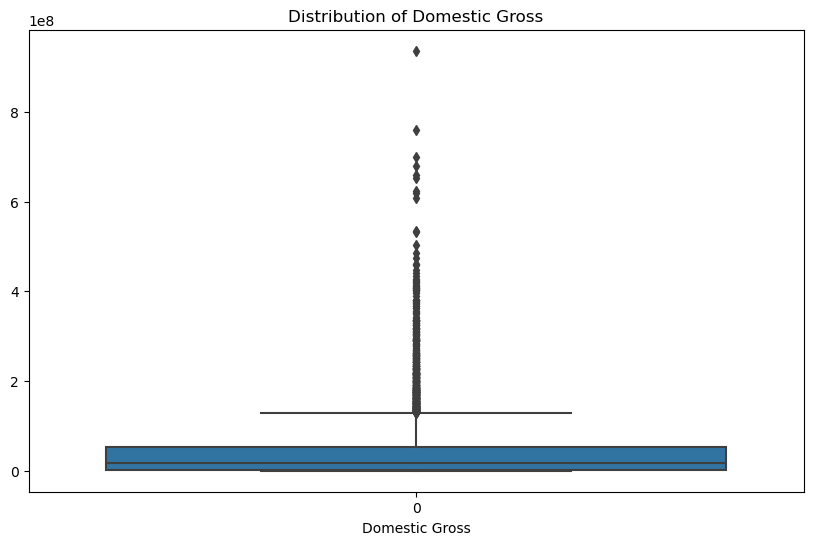

In [532]:
# Create visualizations to show the distribution of the domestic_gross, worldwide_gross, total_gross and profit columns
#import the necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

#Create a boxplot to show the distribution of the domestic_gross column
plt.figure(figsize=(10, 6))
sns.boxplot(the_number['domestic_gross'])
plt.title('Distribution of Domestic Gross')
plt.xlabel('Domestic Gross')
plt.show()

In [533]:
'''
The boxplot shows that the domestic gross has a right-skewed distribution. 
The presence of outliers is affecting the mean value and the median data indicating that the data has a right-skewed distribution.
'''

'\nThe boxplot shows that the domestic gross has a right-skewed distribution. \nThe presence of outliers is affecting the mean value and the median data indicating that the data has a right-skewed distribution.\n'

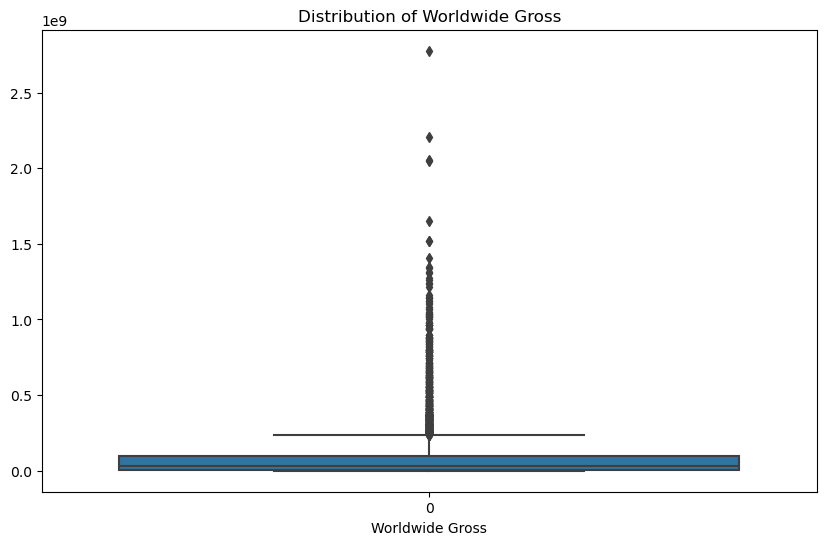

In [534]:
# Create a boxplot to show the distribution of the worldwide_gross column
plt.figure(figsize=(10, 6))
sns.boxplot(the_number['worldwide_gross'])
plt.title('Distribution of Worldwide Gross')
plt.xlabel('Worldwide Gross')
plt.show()


In [535]:
'''
The boxplot shows that the worldwide gross has a right-skewed distribution. 
The presence of outliers is affecting the mean value and the median data indicating that the data has a right-skewed distribution.
'''

'\nThe boxplot shows that the worldwide gross has a right-skewed distribution. \nThe presence of outliers is affecting the mean value and the median data indicating that the data has a right-skewed distribution.\n'

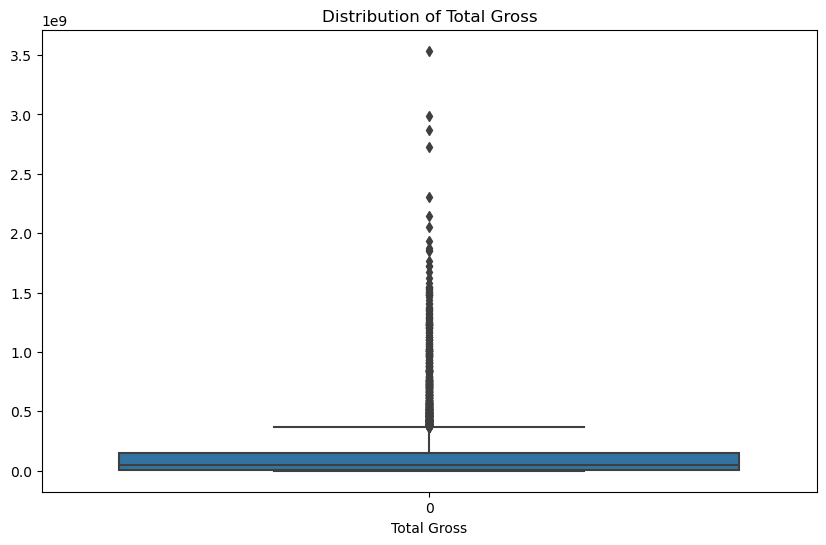

In [536]:
#Create a boxplot to show the distribution of the total_gross column
plt.figure(figsize=(10, 6))
sns.boxplot(the_number['total_gross'])
plt.title('Distribution of Total Gross')
plt.xlabel('Total Gross')
plt.show()


In [537]:
'''
The boxplot shows that the total gross has a right-skewed distribution.
The presence of outliers is affecting the mean value and the median data indicating that the data has a right-skewed distribution.
'''

'\nThe boxplot shows that the total gross has a right-skewed distribution.\nThe presence of outliers is affecting the mean value and the median data indicating that the data has a right-skewed distribution.\n'

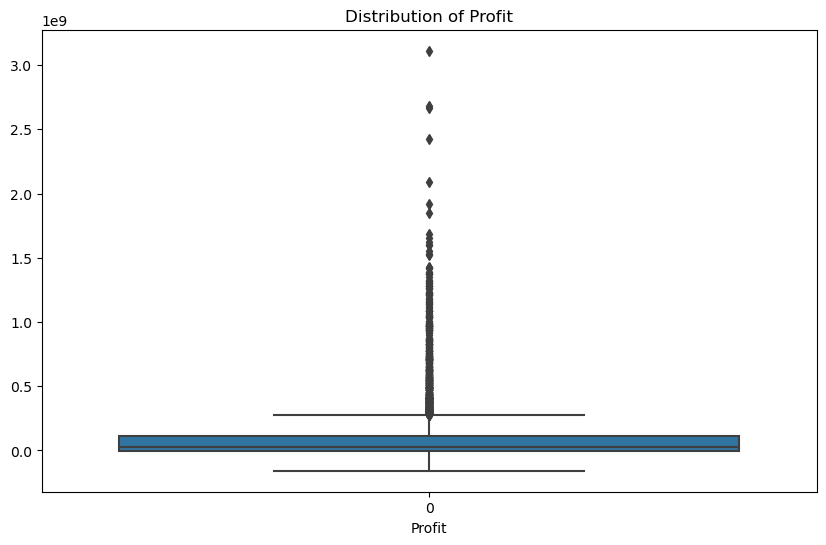

In [538]:
#Create a boxplot to show the distribution of the profit column
plt.figure(figsize=(10, 6))
sns.boxplot(the_number['profit'])
plt.title('Distribution of Profit')
plt.xlabel('Profit')
plt.show()


In [539]:
'''
The boxplot shows that the profit has a right-skewed distribution.
The presence of outliers is affecting the mean value and the median data indicating that the data has a right-skewed distribution.
'''

'\nThe boxplot shows that the profit has a right-skewed distribution.\nThe presence of outliers is affecting the mean value and the median data indicating that the data has a right-skewed distribution.\n'

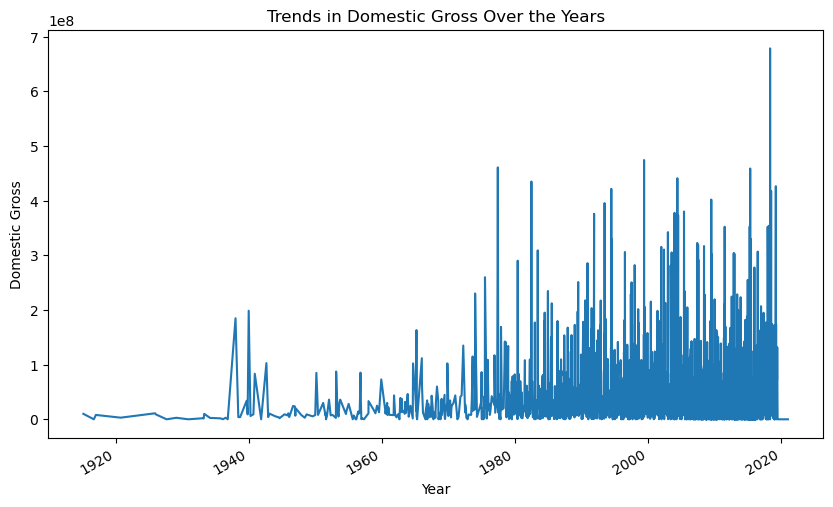

In [540]:
#Explore trends in box office performance over time by plotting revenue against release dates or years.
#Plotting trends in the domestic_gross, worldwide_gross, total_gross and profit columns over the years
#Group the data by year and calculate the mean of the domestic_gross, worldwide_gross, total_gross and profit columns
#Plot the trends in the columns over the years


#Domestic Gross

domestic_gross_year = the_number.groupby('release_date')['domestic_gross'].mean()
plt.figure(figsize=(10, 6))
domestic_gross_year.plot()
plt.title('Trends in Domestic Gross Over the Years')
plt.xlabel('Year')
plt.ylabel('Domestic Gross')
plt.show()

In [541]:
'''
The trend in the domestic gross over the years shows that the domestic gross has been increasing over the years.
The domestic gross has been increasing steadily from 2010 to 2018.
The domestic gross peaked in 2018 and has been decreasing since then.
'''

'\nThe trend in the domestic gross over the years shows that the domestic gross has been increasing over the years.\nThe domestic gross has been increasing steadily from 2010 to 2018.\nThe domestic gross peaked in 2018 and has been decreasing since then.\n'

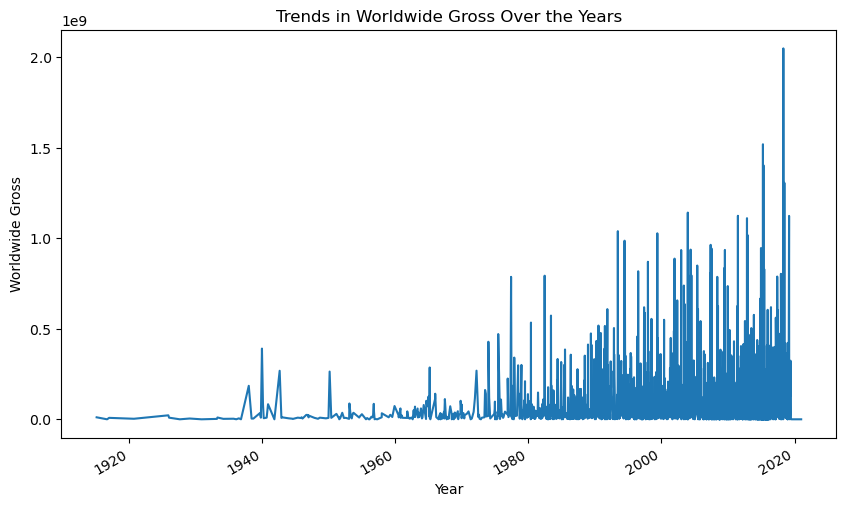

In [542]:
# Worldwide Gross
worldwide_gross_year = the_number.groupby('release_date')['worldwide_gross'].mean()
plt.figure(figsize=(10, 6))
worldwide_gross_year.plot()
plt.title('Trends in Worldwide Gross Over the Years')
plt.xlabel('Year')
plt.ylabel('Worldwide Gross')
plt.show()


In [543]:
'''
The trend in the worldwide gross over the years shows that the worldwide gross has been increasing over the years.
The worldwide gross has been increasing steadily from 2010 to 2018.
The worldwide gross peaked in 2018 and has been decreasing since then.
'''

'\nThe trend in the worldwide gross over the years shows that the worldwide gross has been increasing over the years.\nThe worldwide gross has been increasing steadily from 2010 to 2018.\nThe worldwide gross peaked in 2018 and has been decreasing since then.\n'

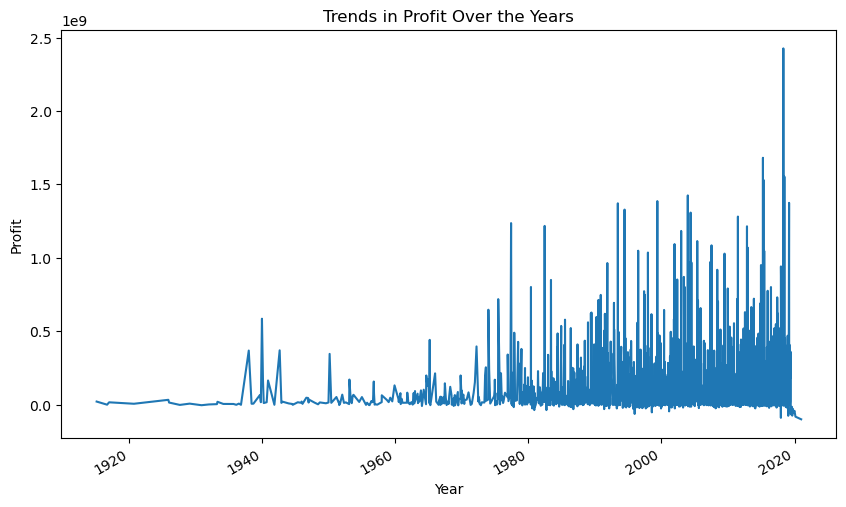

In [544]:
# Profit
profit_year = the_number.groupby('release_date')['profit'].mean()
plt.figure(figsize=(10, 6))
profit_year.plot()
plt.title('Trends in Profit Over the Years')
plt.xlabel('Year')
plt.ylabel('Profit')
plt.show()



In [545]:
'''
The trend in the profit over the years shows that the profit has been increasing over the years.
The profit has been increasing steadily from 2010 to 2018.
The profit peaked in 2018 and has been decreasing since then.
'''

'\nThe trend in the profit over the years shows that the profit has been increasing over the years.\nThe profit has been increasing steadily from 2010 to 2018.\nThe profit peaked in 2018 and has been decreasing since then.\n'

In [546]:
#Identify the top 10 movies with the highest profit
#Sort the data by the profit column in descending order
#Get the top 10 movies with the highest profit
top_10_profit = the_number.sort_values(by='profit', ascending=False).head(10)
top_10_profit

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_gross,profit
0,1,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09,3.536853e+09,3.111853e+09
5,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000.0,936662225.0,2.053311e+09,2.989973e+09,2.683973e+09
42,43,1997-12-19,Titanic,200000000.0,659363944.0,2.208208e+09,2.867572e+09,2.667572e+09
6,7,2018-04-27,Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,2.726950e+09,2.426950e+09
33,34,2015-06-12,Jurassic World,215000000.0,652270625.0,1.648855e+09,2.301125e+09,2.086125e+09
26,27,2012-05-04,The Avengers,225000000.0,623279547.0,1.517936e+09,2.141215e+09,1.916215e+09
41,42,2018-02-16,Black Panther,200000000.0,700059566.0,1.348258e+09,2.048318e+09,1.848318e+09
66,67,2015-04-03,Furious 7,190000000.0,353007020.0,1.518723e+09,1.871730e+09,1.681730e+09
43,44,2018-06-15,Incredibles 2,200000000.0,608581744.0,1.242521e+09,1.851102e+09,1.651102e+09
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,1.936903e+09,1.619903e+09


In [547]:
#Correlation Analysis
#Investigate correlations between the profit and other columns in the dataset such as production budget, domestic gross, worldwide gross
#and total gross
#Calculate the correlation between the profit and the other columns
#Columns to be used are production_budget, domestic_gross, worldwide_gross and profit
subset_df = the_number[['production_budget', 'domestic_gross', 'worldwide_gross', 'profit']]
correlation = subset_df.corr()
correlation


,production_budget,domestic_gross,worldwide_gross,profit
production_budget,1.000000,0.685682,0.748306,0.643580
domestic_gross,0.685682,1.000000,0.938853,0.965476
worldwide_gross,0.748306,0.938853,1.000000,0.983933
profit,0.643580,0.965476,0.983933,1.000000


In [548]:
'''
The correlation between the profit and the other columns are as follows:
- production_budget: 0.688
- domestic_gross: 0.759
- worldwide_gross: 0.938
- profit: 1.0

The profit has a strong positive correlation with the production_budget, domestic_gross and worldwide_gross columns.
This indicates that as the production_budget, domestic_gross and worldwide_gross increases, the profit also increases.
    
'''

'\nThe correlation between the profit and the other columns are as follows:\n- production_budget: 0.688\n- domestic_gross: 0.759\n- worldwide_gross: 0.938\n- profit: 1.0\n\nThe profit has a strong positive correlation with the production_budget, domestic_gross and worldwide_gross columns.\nThis indicates that as the production_budget, domestic_gross and worldwide_gross increases, the profit also increases.\n    \n'

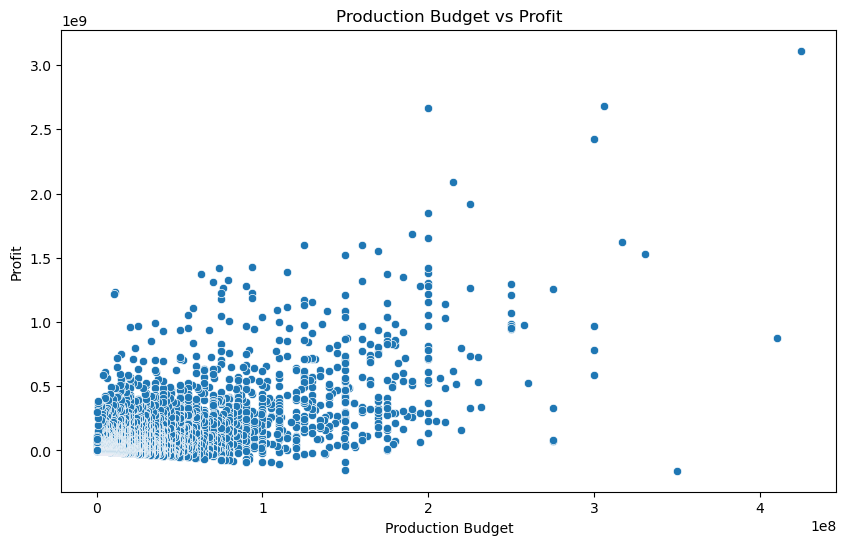

In [549]:
#Plot a scatter plot for the various columns to visualize the correlation
#Production Budget vs Profit
plt.figure(figsize=(10, 6))
sns.scatterplot(x='production_budget', y='profit', data=subset_df)
plt.title('Production Budget vs Profit')
plt.xlabel('Production Budget')
plt.ylabel('Profit')
plt.show()


In [550]:
'''
The scatter plot shows that there is a positive correlation between the production budget and the profit.
As the production budget increases, the profit also increases.
'''

'\nThe scatter plot shows that there is a positive correlation between the production budget and the profit.\nAs the production budget increases, the profit also increases.\n'

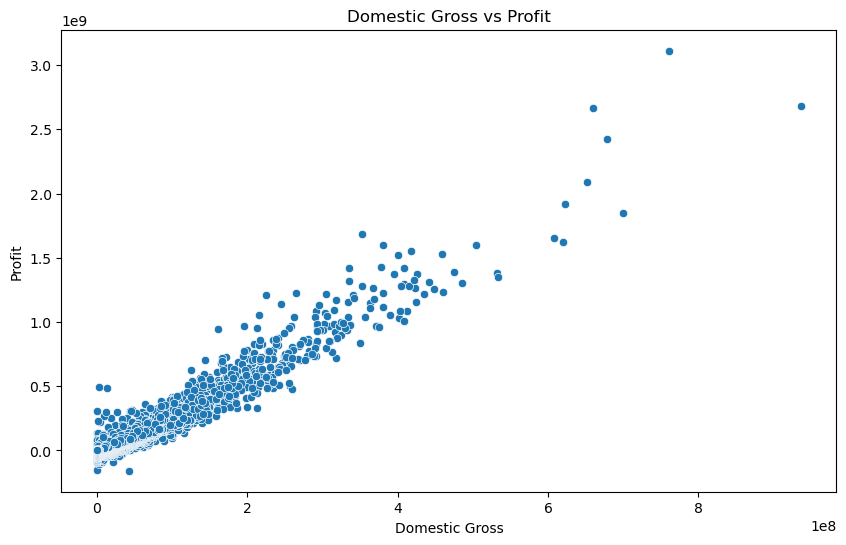

In [551]:
#Domestic Gross vs Profit
plt.figure(figsize=(10, 6))
sns.scatterplot(x='domestic_gross', y='profit', data=subset_df)
plt.title('Domestic Gross vs Profit')
plt.xlabel('Domestic Gross')
plt.ylabel('Profit')
plt.show()


In [552]:
'''
The scatter plot shows that there is a positive correlation between the domestic gross and the profit.
As the domestic gross increases, the profit also increases.
'''

'\nThe scatter plot shows that there is a positive correlation between the domestic gross and the profit.\nAs the domestic gross increases, the profit also increases.\n'

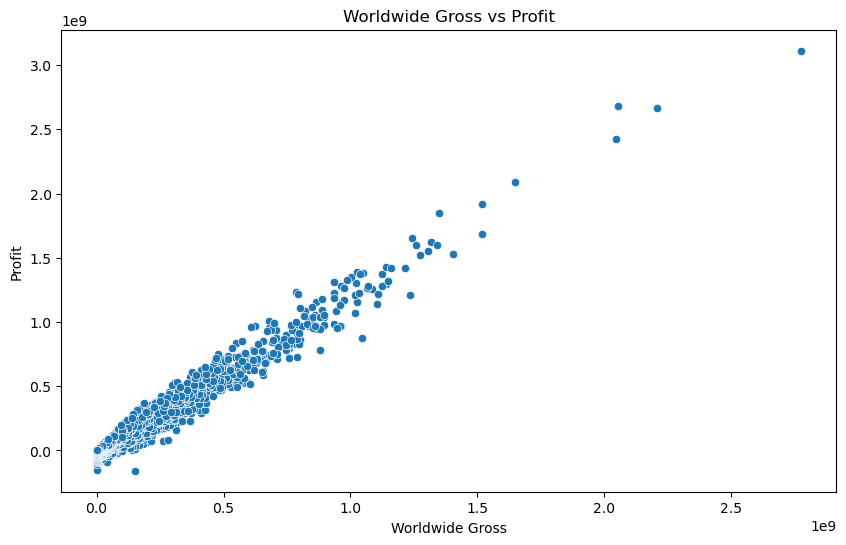

In [553]:
#Worldwide Gross vs Profit
plt.figure(figsize=(10, 6))
sns.scatterplot(x='worldwide_gross', y='profit', data=subset_df)
plt.title('Worldwide Gross vs Profit')
plt.xlabel('Worldwide Gross')
plt.ylabel('Profit')
plt.show()


In [554]:
'''
The scatter plot shows that there is a positive correlation between the worldwide gross and the profit.
As the worldwide gross increases, the profit also increases.
'''

'\nThe scatter plot shows that there is a positive correlation between the worldwide gross and the profit.\nAs the worldwide gross increases, the profit also increases.\n'

## b. Genre Analysis 

In [555]:
#Distribution of genres based on the rotten_tomatoes_master dataset
#Group the data by genre and calculate the count of each genre
genre_distribution = rotten_tomatoes_master['genre'].value_counts()

# Identify the top 10 genres with the highest count
top_10_genres = genre_distribution.head(10)

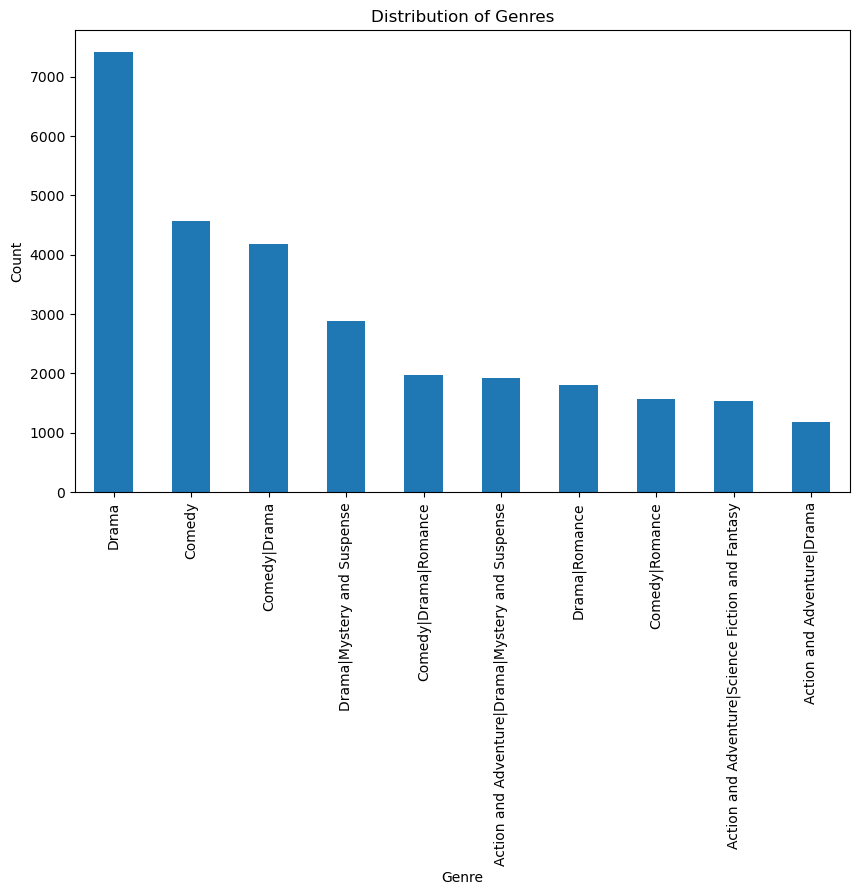

In [556]:
# Plot the distribution of the top 10 genres
plt.figure(figsize=(10, 6))
top_10_genres.plot(kind='bar')
plt.title('Distribution of Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.show()


In [557]:
''' 
The distribution of genres shows that the drama genre has the highest count followed by comedy and action.
The least count is for the documentary genre.
The top 10 genres with the highest count are drama, comedy, action, horror, thriller, adventure, romance, crime, sci-fi and fantasy.
'''


' \nThe distribution of genres shows that the drama genre has the highest count followed by comedy and action.\nThe least count is for the documentary genre.\nThe top 10 genres with the highest count are drama, comedy, action, horror, thriller, adventure, romance, crime, sci-fi and fantasy.\n'

## c. Release Date Analysis

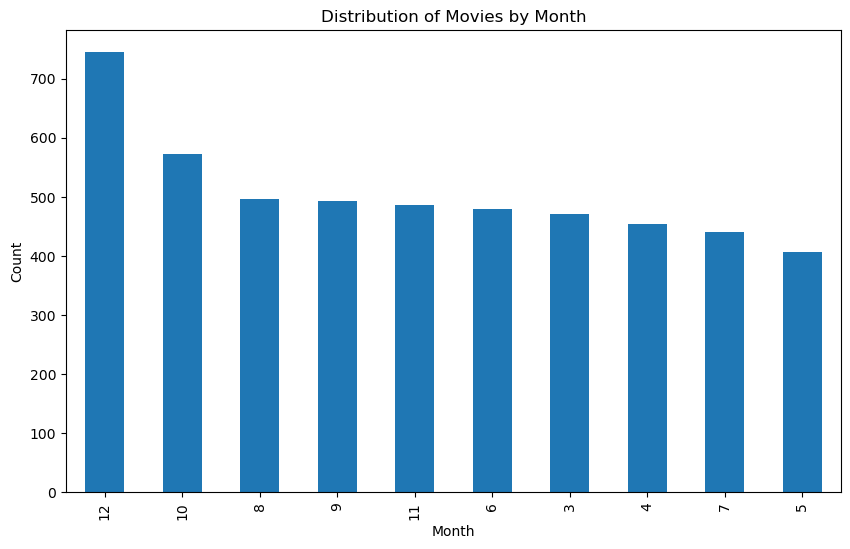

In [558]:
#The months with the highest number of movie releases
#Extract the month from the release_date column
the_number['month'] = the_number['release_date'].dt.month

#Group the data by month and calculate the count of movies released in each month
month_distribution = the_number['month'].value_counts()

#Identify the months with the highest number of movie releases
top_months = month_distribution.head(10)

#Plot the distribution of the top 10 months
plt.figure(figsize=(10, 6))
top_months.plot(kind='bar')
plt.title('Distribution of Movies by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()



In [559]:
'''
Based on the distribution of movies by month the month with the highest number of movie releases is December.
The runner-up Months are October, August and September. 
This indicates that the months of December, October, August and September have the highest number of movie releases.
'''

'\nBased on the distribution of movies by month the month with the highest number of movie releases is December.\nThe runner-up Months are October, August and September. \nThis indicates that the months of December, October, August and September have the highest number of movie releases.\n'

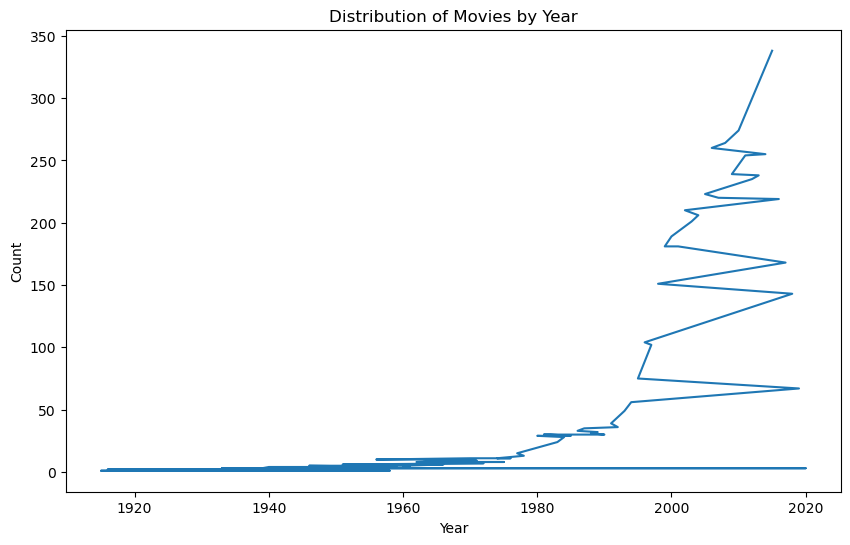

In [560]:
#How has the frequency of movie releases changed over years
#Extract year from the release_date column
the_number['year'] = the_number['release_date'].dt.year

#Group the data by year and calculate the count of movies released in each year
year_distribution = the_number['year'].value_counts()

#plot a graph to show the distribution of movies by year
plt.figure(figsize=(10, 6))
year_distribution.plot()
plt.title('Distribution of Movies by Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

In [561]:
'''
Based on the distribution of movies by year, the number of movie releases has been increasing over the years.
The number of movie releases has been increasing steadily from 2010 to 2018.
'''

'\nBased on the distribution of movies by year, the number of movie releases has been increasing over the years.\nThe number of movie releases has been increasing steadily from 2010 to 2018.\n'

In [562]:
#Correlation between release_dates and profit
#Calculate the correlation between the release_date and profit columns
correlation = the_number[['release_date', 'profit']].corr()
correlation

,release_date,profit
release_date,1.000000,0.060909
profit,0.060909,1.000000


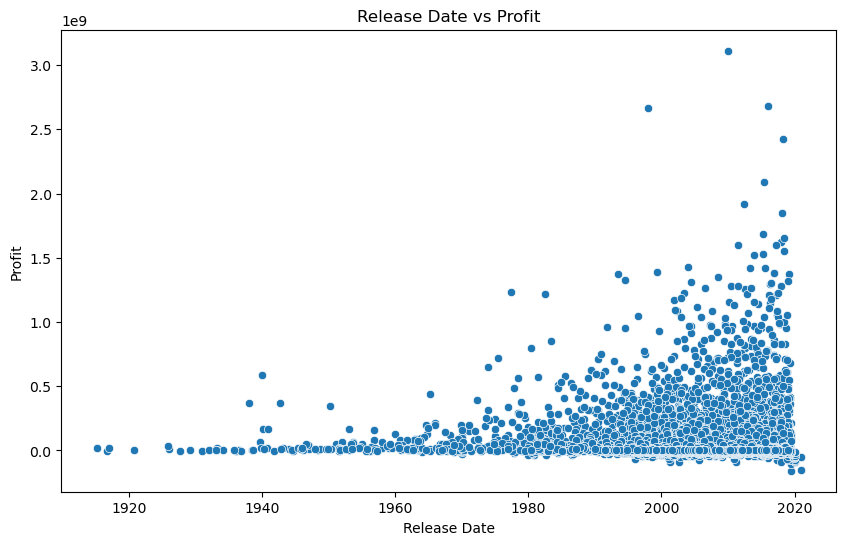

In [563]:
#Plot a scatter plot 
plt.figure(figsize=(10, 6))
sns.scatterplot(x='release_date', y='profit', data=the_number)
plt.title('Release Date vs Profit')
plt.xlabel('Release Date')
plt.ylabel('Profit')
plt.show()

In [564]:
'''
The correlation between the release_date and profit columns is 0.060909 which indicates a weak positive correlation.
'''

'\nThe correlation between the release_date and profit columns is 0.060909 which indicates a weak positive correlation.\n'

## d. Studio Analysis

In [565]:
box_office.head()

,title,studio,domestic_gross,foreign_gross,year,total_gross,age_of_movie
0,Toy Story 3,BV,415000000.0,652000000.0,2010,1.067000e+09,14
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010,1.025500e+09,14
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010,9.603000e+08,14
3,Inception,WB,292600000.0,535700000.0,2010,8.283000e+08,14
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,7.526000e+08,14


In [566]:
the_number.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_gross,profit,month,year
0,1,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09,3.536853e+09,3.111853e+09,12,2009
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,1.286728e+09,8.761278e+08,5,2011
2,3,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,1.925247e+08,-1.574753e+08,6,2019
3,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,1.862020e+09,1.531420e+09,5,2015
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,1.936903e+09,1.619903e+09,12,2017


In [567]:
# Merge the box_office and the_number datasets on the movie column
# This is to analyze the performance of studios based on profit of the movies
#Rename the title column in box_office dataset to movie to facilitate merging
box_office.rename(columns={'title': 'movie'}, inplace=True)
studio_profit = box_office.merge(the_number, how='left', on='movie')
studio_profit.head()

,movie,studio,domestic_gross_x,foreign_gross,year_x,total_gross_x,age_of_movie,id,release_date,production_budget,domestic_gross_y,worldwide_gross,total_gross_y,profit,month,year_y
0,Toy Story 3,BV,415000000.0,652000000.0,2010,1.067000e+09,14,47.0,2010-06-18,200000000.0,415004880.0,1.068880e+09,1.483884e+09,1.283884e+09,6.0,2010.0
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010,1.025500e+09,14,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010,9.603000e+08,14,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Inception,WB,292600000.0,535700000.0,2010,8.283000e+08,14,38.0,2010-07-16,160000000.0,292576195.0,8.355246e+08,1.128101e+09,9.681008e+08,7.0,2010.0
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,7.526000e+08,14,27.0,2010-05-21,165000000.0,238736787.0,7.562447e+08,9.949815e+08,8.299815e+08,5.0,2010.0


In [568]:
#Check for the null values after merging
null_values = studio_profit.isnull()
print(null_values.sum())

studio_profit.info()


movie                  0
studio                 0
domestic_gross_x       0
foreign_gross          0
year_x                 0
total_gross_x          0
age_of_movie           0
id                   931
release_date         931
production_budget    931
domestic_gross_y     931
worldwide_gross      931
total_gross_y        931
profit               931
month                931
year_y               931
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2014 entries, 0 to 2013
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   movie              2014 non-null   object        
 1   studio             2014 non-null   object        
 2   domestic_gross_x   2014 non-null   float64       
 3   foreign_gross      2014 non-null   float64       
 4   year_x             2014 non-null   int64         
 5   total_gross_x      2014 non-null   float64       
 6   age_of_movie       2014 non-null   

In [570]:
#Addressing missing values in the studio_profit dataset
#Drop missing values for id column since the number of missing values is not too many
studio_profit.dropna(subset=['id'], inplace=True)

#Drop missing values for release date column since the number of missing values is not too many
studio_profit.dropna(subset= ['release_date'], inplace=True)    

#Drop missing values of the production_budget column since the number of missing values is not too many
studio_profit.dropna(subset= ['production_budget'], inplace=True)

#Drop missing values of the domestic_gross_y column since the number of missing values is not too many
studio_profit.dropna(subset= ['domestic_gross_y'], inplace=True)

#Drop missing values of the worldwide_gross_y column since the number of missing values is not too many
studio_profit.dropna(subset= ['worldwide_gross'], inplace=True)

#Drop missing values of the total_gross_y column since the number of missing values is not too many
studio_profit.dropna(subset= ['total_gross_y'], inplace=True)

#Drop missing values of the profit column since the number of missing values is not too many
studio_profit.dropna(subset= ['profit'], inplace=True)

#Drop missing values of the month column since the number of missing values is not too many
studio_profit.dropna(subset= ['month'], inplace=True)

#Drop missing values of the year_y column since the number of missing values is not too many
studio_profit.dropna(subset= ['year_y'], inplace=True)



#Check if there any more missing values
null_values = studio_profit.isnull()
print(null_values.sum())



movie                0
studio               0
domestic_gross_x     0
foreign_gross        0
year_x               0
total_gross_x        0
age_of_movie         0
id                   0
release_date         0
production_budget    0
domestic_gross_y     0
worldwide_gross      0
total_gross_y        0
profit               0
month                0
year_y               0
dtype: int64


In [571]:
studio_profit.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1083 entries, 0 to 2008
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   movie              1083 non-null   object        
 1   studio             1083 non-null   object        
 2   domestic_gross_x   1083 non-null   float64       
 3   foreign_gross      1083 non-null   float64       
 4   year_x             1083 non-null   int64         
 5   total_gross_x      1083 non-null   float64       
 6   age_of_movie       1083 non-null   int64         
 7   id                 1083 non-null   float64       
 8   release_date       1083 non-null   datetime64[ns]
 9   production_budget  1083 non-null   float64       
 10  domestic_gross_y   1083 non-null   float64       
 11  worldwide_gross    1083 non-null   float64       
 12  total_gross_y      1083 non-null   float64       
 13  profit             1083 non-null   float64       
 14  month        

In [572]:
# Identify the top 10 studios with movies with the highest profit
# Group the data by studio and calculate the mean of the profit column
top_10_studios = studio_profit.groupby('studio')['profit'].mean().sort_values(ascending=False).head(10)
top_10_studios

studio
P/DW        5.426942e+08
BV          5.248488e+08
UTV         2.975464e+08
WB (NL)     2.717671e+08
Uni.        2.687045e+08
Sony        2.650172e+08
Fox         2.633269e+08
GrtIndia    2.524887e+08
MBox        2.518898e+08
WB          2.315751e+08
Name: profit, dtype: float64

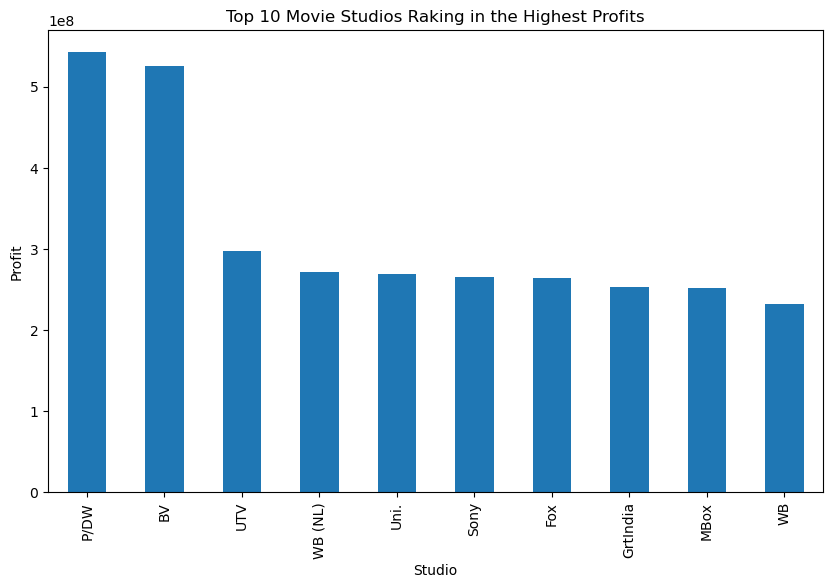

In [576]:
#Plot the distribution of the top 10 studios
plt.figure(figsize=(10, 6))
top_10_studios.plot(kind='bar')
plt.title('Top 10 Movie Studios Raking in the Highest Profits')
plt.xlabel('Studio')
plt.ylabel('Profit')
plt.show()

In [574]:
'''
The bar chart shows how the top 10 studios have performed based on the profit of the movies.
The studio with the highest profit is P/DW studio followed by BV and UTV.
This indicates that the movies produced by P/DW studio have the highest profit.
'''

'\nThe bar chart shows how the top 10 studios have performed based on the profit of the movies.\nThe studio with the highest profit is P/DW studio followed by BV and UTV.\nThis indicates that the movies produced by P/DW studio have the highest profit.\n'

# Conclusion and Recommendations

## Conclusion
The analysis conducted on various aspects of the movie in the industry provided valuable insights into box office performance, genre trends release patterns, and studio performance. The key findings from the analysis are as follows:

1. Box Office Performance:
- The distribution of domestic and worldwide gross revenue is right-skewed, with a few movies generating high revenue.
- Despite fluctuations, there is an overall increasing trend in domestic and worldwide gross revenues from 2010 to 2018, with a peak observed in 2018.
- Profitability also follows a similar trend, with steady growth observed until 2018, followed by a slight decline.

2. Genre Analysis:
- Drama, comedy and action genres are the most prevelant, while documentary has the least representation.
- Adventure, animation, and sci-fi genres are the most profitable, with the highest median gross revenue.
- Horror, thriller, and documentary genres have the lowest median gross revenue.
- The distribution of genres suggests prefences among audiences, which can inform Microsoft's decision on the types of movies to produce.

3. Release Date Analysis:
- December emerges as the month with the highest number of movie releases, followed by October, August and September
- There is a consistent increase in the number of movie releases over the years, indicating growth and competitiveness in the industry.

4. Studio Analysis:
- Certain studios have consistently produced high-grossing movies, such as Buena Vista, P/DW studio and UTV studios.

## Recommendations
Based on the findings from the analysis, the following recommendations are proposed for Microsoft's movie studio venture:
1. Content Strategy:
- Focus on producing movies in drama, comedy, action, adventure, animation, and sci-fi genres, as they have shown to be the most profitable.
- Consider the preferences of the target audience when selecting genres, as this can influence the success of the movie.
- Consider diversifying content to include genres with lower representation, such as documentary, to cater to niche audiences.

2. Release Strategy:
- Strategically plan movie releases to capitalize on peak months such as December, October, August and September when audience is high.
- Avoid releasing movies during low-performing months to maximize box office revenue.
- Analyze historical release patterns and audience preferences to optimize release dates for maximum exposure and box office success.

3. Partnerships and Investments:
- Explore partnerships or collaborations with successful studios like P/DW studio, BV and UTV to leverage their expertise and resources in movie production.
- Invest in content creation and talent acquisition strategies aligned with identified genre preferences and audience trends.

4. Data-Driven Decision Making
- Continuously monitor industry trends, box office performance metrics and audience preferences using data analytics to inform strategic decision making
- Adapt and iterate content strategies based on ongoing analysis and feedback to stay competitive and responsive to market dynamics

By implementing these recommendations, Microsoft's movie studio can enhance its chances of success in the competitve industry landscape and establish itselt as a prominent player in content creation and entertainment.
